# Model iteration

Adding layers to original FSM

In [1]:
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Flatten
from functions import *

%load_ext autoreload
%autoreload 2

## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

Keeping default parameters for now as far as `target_size=(256, 256)` and all that.

In [2]:
# Image folder for training
train_dir = 'input_images/train'

In [3]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [4]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1009 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


## Build model and train

In [5]:
# Instatiate model
nn_model_1 = models.Sequential()

# Add model layers
nn_model_1.add(Flatten(input_shape=(256, 256, 3)))
nn_model_1.add(Dense(512, activation='relu'))
nn_model_1.add(Dense(64, activation='relu'))
nn_model_1.add(Dense(32, activation='relu'))
nn_model_1.add(Dense(12, activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid'))

# Compile
nn_model_1.compile(optimizer='sgd',
                   loss='binary_crossentropy',
                   metrics=['acc', 'Recall', 'Precision'])

In [7]:
nn_model_1_history = nn_model_1.fit(train_gen, 
                                    epochs=20,
                                    validation_data=val_gen)

Epoch 1/20
32/32 [==============================] - 127s 4s/step - loss: 0.7375 - acc: 0.5253 - recall: 0.4990 - precision: 0.5314 - val_loss: 0.6772 - val_acc: 0.6587 - val_recall: 0.7795 - val_precision: 0.6306
Epoch 2/20
32/32 [==============================] - 122s 4s/step - loss: 0.6707 - acc: 0.5937 - recall: 0.5088 - precision: 0.6181 - val_loss: 0.6485 - val_acc: 0.6667 - val_recall: 0.5512 - val_precision: 0.7216
Epoch 3/20
32/32 [==============================] - 122s 4s/step - loss: 0.6267 - acc: 0.6511 - recall: 0.6208 - precision: 0.6653 - val_loss: 0.6489 - val_acc: 0.5952 - val_recall: 0.2756 - val_precision: 0.7778
Epoch 4/20
32/32 [==============================] - 123s 4s/step - loss: 0.6377 - acc: 0.6194 - recall: 0.5128 - precision: 0.6574 - val_loss: 0.6108 - val_acc: 0.6667 - val_recall: 0.4567 - val_precision: 0.7945
Epoch 5/20
32/32 [==============================] - 123s 4s/step - loss: 0.6008 - acc: 0.6581 - recall: 0.5560 - precision: 0.7040 - val_loss: 0.699

In [8]:
nn_model_1.save('models/nn_model_1.h5')

Training eval:
32/32 [==============================] - 103s 3s/step - loss: 0.4355 - acc: 0.7830 - recall: 0.6365 - precision: 0.9050

Validation eval:
8/8 [==============================] - 17s 2s/step - loss: 0.5303 - acc: 0.7341 - recall: 0.7244 - precision: 0.7419


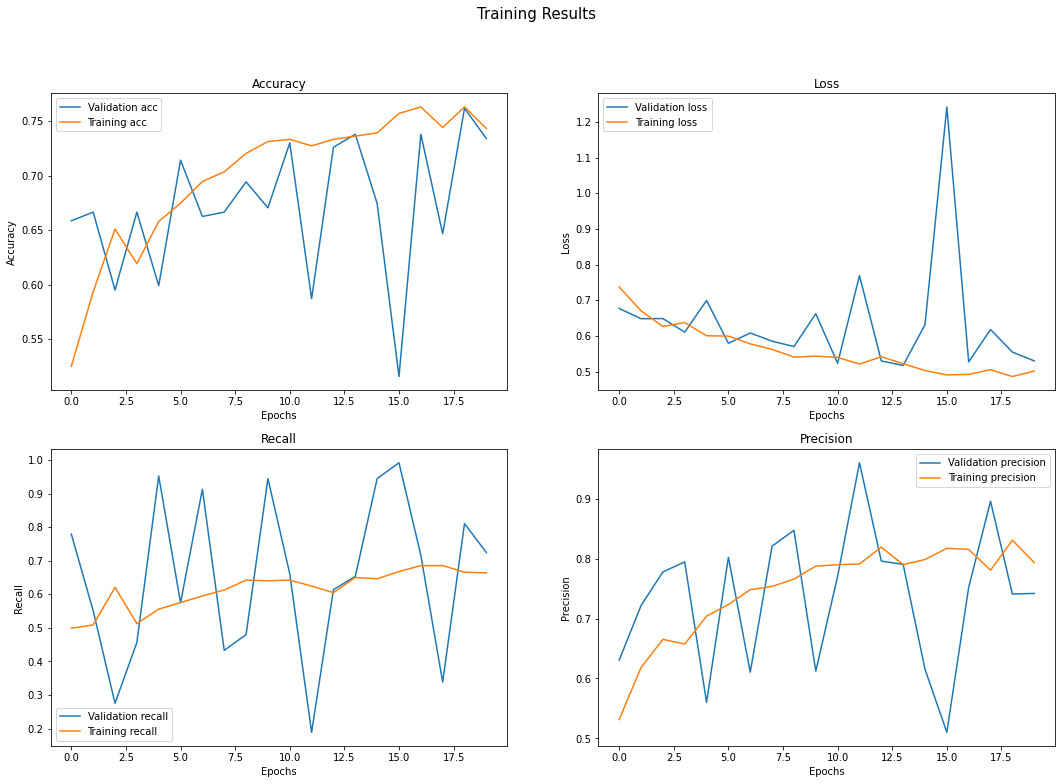

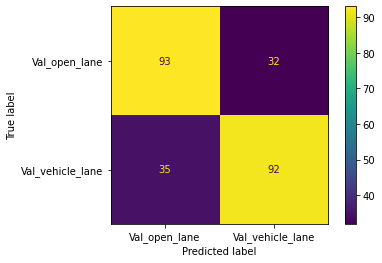

In [9]:
visualize_results(nn_model_1_history, nn_model_1, train_gen, val_gen)

In [16]:
# Pickle results
from pickle import load
from pickle import dump

dump(nn_model_1_history.history, open('models/nn_model_1_history.pkl', 'wb'))

*Note: Pickling has been added to the `visualize_results` function as a default option.*

This shows a significant improvement over my FSM. Accuracy improved from 70%-->73%, while recall and precision are more balanced. Non-target class true predictions increased by about 50%.

## Next iteration



Before moving on to CNNs, I also want to try image augmentation using the parameters built into `ImageDataGenerator` (